In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import *



from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# # Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")


In [2]:
#importing pulse related packages

from qiskit import pulse
from qiskit.pulse import ControlChannel, DriveChannel, Play
from qiskit.pulse.library import Drag
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import numpy as np
import pandas as pd

## Backend details ##

In [3]:

# Backend details, use IBMqiskitruntimeservice now since IBMProvider got deprecated.



provider = IBMProvider()
provider.backends()
backend = provider.get_backend('ibm_hanoi')
# service = ExperimentData.get_service_from_backend(backend)

conf = backend.configuration()
defs = backend.defaults()
props = backend.properties()

## Accessing Single qubit gates ##

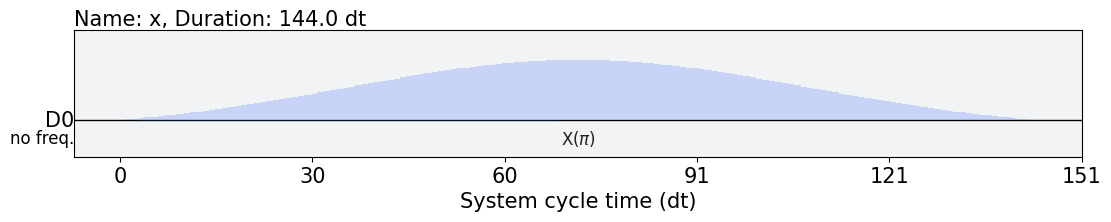

In [4]:
qubit =0
inst_sched_map = defs.instruction_schedule_map
x01_sched = inst_sched_map.get('x', qubits=[qubit])
x01_pulse = x01_sched.instructions[0][1].pulse
sigma = x01_pulse.sigma
angle = x01_pulse.angle

x01_sched.draw()

In [5]:
## Defining all the single qutrit pulses (x12, sx12, rz12)

##Qutrit-0

##Creating the x12 pulse with same parameters as default pulse but with frequency f12##

In [6]:
qubit = 1

inst_sched_map = defs.instruction_schedule_map
x01_sched = inst_sched_map.get('x', qubits=[qubit])
x01_pulse = x01_sched.instructions[0][1].pulse
sigma = x01_pulse.sigma
beta = x01_pulse.beta
angle = x01_pulse.angle
#amp = x01_pulse.amp  ## 0-1 amp for now

pairs_dict = [{key: val} for key, val in conf.control_channels.items() if qubit in key]
ctrl_insts = [[inst_sched_map.get('cx', qubits=pair[0]).filter(channels=pair[1], instruction_types=Play).instructions 
               for pair in pairs.items()] for pairs in pairs_dict]

chan01 = DriveChannel(qubit)
chan_cr = [ctrl_inst for ctrl_inst in ctrl_insts if len(ctrl_inst[0]) > 0][0][0][0][1].channel
chan12 = [list(pair_dict.values()) for pair_dict in pairs_dict if chan_cr not in list(pair_dict.values())[0]][0][0][0]
chan12 = ControlChannel(1)
print(pairs_dict)
print(f'Channels are\n  01 Drive: {chan01}\n  12 Drive: {chan12}\n  Cross Res: {chan_cr}')


[{(0, 1): [ControlChannel(0)]}, {(1, 0): [ControlChannel(1)]}, {(1, 2): [ControlChannel(2)]}, {(1, 4): [ControlChannel(3)]}, {(2, 1): [ControlChannel(4)]}, {(4, 1): [ControlChannel(8)]}]
Channels are
  01 Drive: DriveChannel(1)
  12 Drive: ControlChannel(1)
  Cross Res: ControlChannel(0)


In [7]:
freqs01 = [props.frequency(qidx) for qidx in range(conf.num_qubits)]
anharms = [conf.hamiltonian['vars'][f'delta{qidx}']/(2*np.pi) for qidx in range(conf.num_qubits)]
freqs12 = [freqs01[qidx] + anharms[qidx] for qidx in range(conf.num_qubits)]

dt = backend.dt
sqglen_dt= int(props.gate_length('x', qubits=[0])/dt) # all 1Q gates have same length

json_decoder.target_from_server_data:WARNING:2024-04-27 23:43:14,702: Definition of instruction switch_case is not found in the Qiskit namespace and GateConfig is not provided by the BackendConfiguration payload. Qiskit Gate model cannot be instantiated for this instruction and this instruction is silently excluded from the Target. Please add new gate class to Qiskit or provide GateConfig for this name.


In [8]:
amp = 2*7.452953e-02
alpha = -3.419883e+08
beta12 = 2.682730e-01

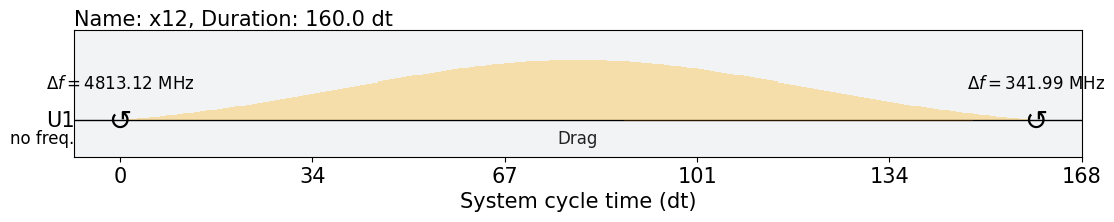

In [9]:
with pulse.build(name='x12') as sched0:
    with pulse.align_sequential():
       
        pulse.set_frequency(freqs01[qubit]+alpha, chan12)
        
        pulse.play(Drag(
            duration=160, 
            sigma=40, 
            beta=beta12, 
            amp=amp, 
            angle=angle), 
        chan12)       
        
        pulse.set_frequency(freqs01[qubit], chan12)

sched0.draw()

In [11]:
with pulse.build(name='rz12p') as rzpsched0:
    with pulse.align_sequential():
             pulse.set_frequency(freqs01[qubit]+alpha, chan12)
             pulse.shift_phase(-np.pi/2, chan12)
             pulse.set_frequency(freqs01[qubit], chan12)
                
with pulse.build(name='rz12n') as rznsched0:
    with pulse.align_sequential():
             pulse.set_frequency(freqs01[qubit]+alpha, chan12)
             pulse.shift_phase(np.pi/2, chan12)
             pulse.set_frequency(freqs01[qubit], chan12)

In [12]:
amp = 2*8.274180e-02
alpha = -3.394846e+08
beta12 = -1.315730e+00

In [13]:
## Qutrit-1 ##

In [14]:
qubit = 2

inst_sched_map = defs.instruction_schedule_map
x01_sched = inst_sched_map.get('x', qubits=[qubit])
x01_pulse = x01_sched.instructions[0][1].pulse
sigma = x01_pulse.sigma
beta = x01_pulse.beta
angle = x01_pulse.angle

pairs_dict = [{key: val} for key, val in conf.control_channels.items() if qubit in key]
ctrl_insts = [[inst_sched_map.get('cx', qubits=pair[0]).filter(channels=pair[1], instruction_types=Play).instructions 
               for pair in pairs.items()] for pairs in pairs_dict]

chan01 = DriveChannel(qubit)
chan_cr = [ctrl_inst for ctrl_inst in ctrl_insts if len(ctrl_inst[0]) > 0][0][0][0][1].channel
chan12 = [list(pair_dict.values()) for pair_dict in pairs_dict if chan_cr not in list(pair_dict.values())[0]][0][0][0]
chan12 = ControlChannel(5)
print(f'Channels are\n  01 Drive: {chan01}\n  12 Drive: {chan12}\n  Cross Res: {chan_cr}')
print(pairs_dict)

Channels are
  01 Drive: DriveChannel(2)
  12 Drive: ControlChannel(5)
  Cross Res: ControlChannel(4)
[{(1, 2): [ControlChannel(2)]}, {(2, 1): [ControlChannel(4)]}, {(2, 3): [ControlChannel(5)]}, {(3, 2): [ControlChannel(6)]}]


In [15]:
freqs01 = [props.frequency(qidx) for qidx in range(conf.num_qubits)]
anharms = [conf.hamiltonian['vars'][f'delta{qidx}']/(2*np.pi) for qidx in range(conf.num_qubits)]
freqs12 = [freqs01[qidx] + anharms[qidx] for qidx in range(conf.num_qubits)]

dt = backend.dt
sqglen_dt= int(props.gate_length('x', qubits=[0])/dt) # all 1Q gates have same length


In [16]:
chan12

ControlChannel(5)

In [17]:
with pulse.build(name='x12') as sched1:
    with pulse.align_sequential():
            pulse.set_frequency(freqs01[qubit]+alpha, chan12)
      
            pulse.play(Drag(
                duration=160, 
                sigma=40, 
                beta=beta12, 
                amp=amp, 
                angle=angle), 
            chan12)
        
            pulse.set_frequency(freqs01[qubit], chan12)

In [19]:
with pulse.build(name='rz12p') as rzpsched1:
    with pulse.align_sequential():
            pulse.set_frequency(freqs01[qubit]+alpha, chan12)
            pulse.shift_phase(-np.pi/2, chan12)
            pulse.set_frequency(freqs01[qubit], chan12)
                
with pulse.build(name='rz12n') as rznsched1:
    with pulse.align_sequential():
             pulse.set_frequency(freqs01[qubit]+ alpha, chan12)
             pulse.shift_phase(np.pi/2, chan12)
             pulse.set_frequency(freqs01[qubit], chan12)

In [20]:
## Creating custom x12,sx12,rz gates and linking the calibration details of all the qutrits ##

In [21]:
from qiskit import QuantumCircuit


qc = QuantumCircuit(1, name='x12')
qc.x(0)
x12 = qc.to_instruction()



qc = QuantumCircuit(1, name='sx12')
qc.sx(0)
sx12 = qc.to_instruction()


qc = QuantumCircuit(1, name='rz12p')
qc.rz(0,0)
rz12p = qc.to_instruction()



qc = QuantumCircuit(1, name='rz12n')
qc.rz(0,0)
rz12n = qc.to_instruction()

In [22]:
## Groundstate circuit ##

In [23]:
## Linking the calibration details ##
## GS 1 ##

In [29]:
p41 = [[1.2661036726857864, -0.0027478254726664986, -4.327113330558745],
 [1.3368260442386037, -2.570267490987731, 2.7624268428759815],
 [1.5707963267435896, 3.245104426605544, 0.8523575826273968],
 [2.5989175914428544, -2.9851152387084365, 1.6119972439843349],
 [1.5707982777283522, -3.4023803994350175, -0.10351514421692642],
 [1.249045772356603, -0.2560091014274768, -3.9163283484505147],
 [0.4865258946557298, 3.969607277554976, -0.11425180784052014],
 [1.5707961271613993, 3.926990817034337, 0.256009101388021],
 [0.3715152843156156, 0.7854087301777366, -1.5708076671931164]]

In [ ]:
#Ground state circuits and additional circuits required to get the ternary probability wave vector

In [30]:
#C 0
from qiskit import QuantumCircuit, transpile, schedule, assemble

def cir():
    
    c4 = QuantumCircuit(4,4)

    c4.u(p41[0][0],p41[0][1],p41[0][2],0)
    c4.cx(0,1)
    c4.u(p41[1][0],p41[1][1],p41[1][2],2)
    c4.cx(1,2)
    c4.u(p41[2][0],p41[2][1],p41[2][2],1)
    c4.u(p41[3][0],p41[3][1],p41[3][2],2)
    c4.cx(1,2) 
    c4.u(p41[4][0],p41[4][1],p41[4][2],1)
    c4.cx(2,3)
    c4.u(p41[5][0],p41[5][1],p41[5][2],2)
    c4.u(p41[6][0],p41[6][1],p41[6][2],3)
    c4.cx(2,3)
    c4.u(p41[7][0],p41[7][1],p41[7][2],2)
    c4.u(p41[8][0],p41[8][1],p41[8][2],3)
    
    # c4.barrier()

#0-1 manifolds end here


    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(0)
    c4.append(rz12n,[0])
    c4.cx(0,1)
    c4.x(0)
    c4.append(rz12n,[0])
    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    
    
    
    # c4.measure(0,0)
    # c4.measure(1,1)

    # c4.barrier()

    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    c4.x(3)
    c4.append(rz12n,[3])
    c4.cx(3,2)
    c4.x(3)
    c4.append(rz12n,[3])
    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    
   
    # c4.measure(2,2)
    # c4.measure(3,3)
    
    

    
    
    # c4.add_calibration("x12", qubits=[1], schedule=sched0)
    # c4.add_calibration("x12", qubits=[2], schedule=sched1)


    # c4.add_calibration("rz12p", qubits=[1], schedule=rzpsched0)
    # c4.add_calibration("rz12p", qubits=[2], schedule=rzpsched1)

    # c4.add_calibration("rz12n", qubits=[1], schedule=rznsched0)
    # c4.add_calibration("rz12n", qubits=[2], schedule=rznsched1)

    # c4= transpile(c4,backend=backend,initial_layout=[0,1,2,3,4])
    
    
    return c4
 




In [ ]:
#C 0
from qiskit import QuantumCircuit, transpile, schedule, assemble

def cir0():
    
    c4 = QuantumCircuit(4,4)

    c4.u(p41[0][0],p41[0][1],p41[0][2],0)
    c4.cx(0,1)
    c4.u(p41[1][0],p41[1][1],p41[1][2],2)
    c4.cx(1,2)
    c4.u(p41[2][0],p41[2][1],p41[2][2],1)
    c4.u(p41[3][0],p41[3][1],p41[3][2],2)
    c4.cx(1,2) 
    c4.u(p41[4][0],p41[4][1],p41[4][2],1)
    c4.cx(2,3)
    c4.u(p41[5][0],p41[5][1],p41[5][2],2)
    c4.u(p41[6][0],p41[6][1],p41[6][2],3)
    c4.cx(2,3)
    c4.u(p41[7][0],p41[7][1],p41[7][2],2)
    c4.u(p41[8][0],p41[8][1],p41[8][2],3)
    
    c4.barrier()

#0-1 manifolds end here


    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(0)
    c4.append(rz12n,[0])
    c4.cx(0,1)
    c4.x(0)
    c4.append(rz12n,[0])
    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    
    
    
    c4.measure(0,0)
    c4.measure(1,1)

    c4.barrier()

    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    c4.x(3)
    c4.append(rz12n,[3])
    c4.cx(3,2)
    c4.x(3)
    c4.append(rz12n,[3])
    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    
   
    c4.measure(2,2)
    c4.measure(3,3)
    
    

    
    
    c4.add_calibration("x12", qubits=[1], schedule=sched0)
    c4.add_calibration("x12", qubits=[2], schedule=sched1)


    c4.add_calibration("rz12p", qubits=[1], schedule=rzpsched0)
    c4.add_calibration("rz12p", qubits=[2], schedule=rzpsched1)

    c4.add_calibration("rz12n", qubits=[1], schedule=rznsched0)
    c4.add_calibration("rz12n", qubits=[2], schedule=rznsched1)

    c4= transpile(c4,backend=backend,initial_layout=[3,2,1,4])
    
    
    return c4
 




In [32]:
#C 0
from qiskit import QuantumCircuit, transpile, schedule, assemble

def cir1():
    
    c4 = QuantumCircuit(4,4)

    c4.u(p41[0][0],p41[0][1],p41[0][2],0)
    c4.cx(0,1)
    c4.u(p41[1][0],p41[1][1],p41[1][2],2)
    c4.cx(1,2)
    c4.u(p41[2][0],p41[2][1],p41[2][2],1)
    c4.u(p41[3][0],p41[3][1],p41[3][2],2)
    c4.cx(1,2) 
    c4.u(p41[4][0],p41[4][1],p41[4][2],1)
    c4.cx(2,3)
    c4.u(p41[5][0],p41[5][1],p41[5][2],2)
    c4.u(p41[6][0],p41[6][1],p41[6][2],3)
    c4.cx(2,3)
    c4.u(p41[7][0],p41[7][1],p41[7][2],2)
    c4.u(p41[8][0],p41[8][1],p41[8][2],3)
    c4.barrier()

#0-1 manifolds end here


    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(0)
    c4.append(rz12n,[0])
    c4.cx(0,1)
    c4.x(0)
    c4.append(rz12n,[0])
    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    
    
    
   
   
    c4.measure(0,0)
    c4.measure(1,1)

    c4.barrier()

    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    c4.x(3)
    c4.append(rz12n,[3])
    c4.cx(3,2)
    c4.x(3)
    c4.append(rz12n,[3])
    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    
   
    c4.x(2)
    c4.measure(2,2)
    c4.measure(3,3)
    
    

    
    
    c4.add_calibration("x12", qubits=[1], schedule=sched0)
    c4.add_calibration("x12", qubits=[2], schedule=sched1)


    c4.add_calibration("rz12p", qubits=[1], schedule=rzpsched0)
    c4.add_calibration("rz12p", qubits=[2], schedule=rzpsched1)

    c4.add_calibration("rz12n", qubits=[1], schedule=rznsched0)
    c4.add_calibration("rz12n", qubits=[2], schedule=rznsched1)

    c4= transpile(c4,backend=backend,initial_layout=[3,2,1,4])
    
    
    return c4
 




In [33]:
#C 0
from qiskit import QuantumCircuit, transpile, schedule, assemble

def cir2():
    
    c4 = QuantumCircuit(4,4)
    
    c4.u(p41[0][0],p41[0][1],p41[0][2],0)
    c4.cx(0,1)
    c4.u(p41[1][0],p41[1][1],p41[1][2],2)
    c4.cx(1,2)
    c4.u(p41[2][0],p41[2][1],p41[2][2],1)
    c4.u(p41[3][0],p41[3][1],p41[3][2],2)
    c4.cx(1,2) 
    c4.u(p41[4][0],p41[4][1],p41[4][2],1)
    c4.cx(2,3)
    c4.u(p41[5][0],p41[5][1],p41[5][2],2)
    c4.u(p41[6][0],p41[6][1],p41[6][2],3)
    c4.cx(2,3)
    c4.u(p41[7][0],p41[7][1],p41[7][2],2)
    c4.u(p41[8][0],p41[8][1],p41[8][2],3)
    
    c4.barrier()

#0-1 manifolds end here


    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(0)
    c4.append(rz12n,[0])
    c4.cx(0,1)
    c4.x(0)
    c4.append(rz12n,[0])
    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(1)
    
    c4.measure(0,0)
    c4.measure(1,1)
    
    

    c4.barrier()

    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    c4.x(3)
    c4.append(rz12n,[3])
    c4.cx(3,2)
    c4.x(3)
    c4.append(rz12n,[3])
    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    
   
    
    c4.measure(2,2)
    c4.measure(3,3)
    
    

    
    
    c4.add_calibration("x12", qubits=[1], schedule=sched0)
    c4.add_calibration("x12", qubits=[2], schedule=sched1)


    c4.add_calibration("rz12p", qubits=[1], schedule=rzpsched0)
    c4.add_calibration("rz12p", qubits=[2], schedule=rzpsched1)

    c4.add_calibration("rz12n", qubits=[1], schedule=rznsched0)
    c4.add_calibration("rz12n", qubits=[2], schedule=rznsched1)

    c4= transpile(c4,backend=backend,initial_layout=[3,2,1,4])
    
    
    return c4
 




In [34]:
#C 0
from qiskit import QuantumCircuit, transpile, schedule, assemble

def cir3():
    
    c4 = QuantumCircuit(4,4)

    c4.u(p41[0][0],p41[0][1],p41[0][2],0)
    c4.cx(0,1)
    c4.u(p41[1][0],p41[1][1],p41[1][2],2)
    c4.cx(1,2)
    c4.u(p41[2][0],p41[2][1],p41[2][2],1)
    c4.u(p41[3][0],p41[3][1],p41[3][2],2)
    c4.cx(1,2) 
    c4.u(p41[4][0],p41[4][1],p41[4][2],1)
    c4.cx(2,3)
    c4.u(p41[5][0],p41[5][1],p41[5][2],2)
    c4.u(p41[6][0],p41[6][1],p41[6][2],3)
    c4.cx(2,3)
    c4.u(p41[7][0],p41[7][1],p41[7][2],2)
    c4.u(p41[8][0],p41[8][1],p41[8][2],3)
    
    c4.barrier()

#0-1 manifolds end here


    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    c4.x(0)
    c4.append(rz12n,[0])
    c4.cx(0,1)
    c4.x(0)
    c4.append(rz12n,[0])
    c4.append(x12,[1])
    c4.rz(np.pi/2,1)
    c4.append(rz12p,[1])
    
    
    c4.x(1)
    c4.measure(0,0)
    c4.measure(1,1)

    c4.barrier()

    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    c4.x(3)
    c4.append(rz12n,[3])
    c4.cx(3,2)
    c4.x(3)
    c4.append(rz12n,[3])
    c4.append(x12,[2])
    c4.rz(np.pi/2,2)
    c4.append(rz12p,[2])
    
   
    
    c4.x(2)
    c4.measure(2,2)
    c4.measure(3,3)
    

    
    
    c4.add_calibration("x12", qubits=[1], schedule=sched0)
    c4.add_calibration("x12", qubits=[2], schedule=sched1)


    c4.add_calibration("rz12p", qubits=[1], schedule=rzpsched0)
    c4.add_calibration("rz12p", qubits=[2], schedule=rzpsched1)

    c4.add_calibration("rz12n", qubits=[1], schedule=rznsched0)
    c4.add_calibration("rz12n", qubits=[2], schedule=rznsched1)

    c4= transpile(c4,backend=backend,initial_layout=[3,2,1,4])
    
    
    return c4
 




In [35]:
qc0,qc1,qc2,qc3 = cir0(),cir1(),cir2(),cir3()

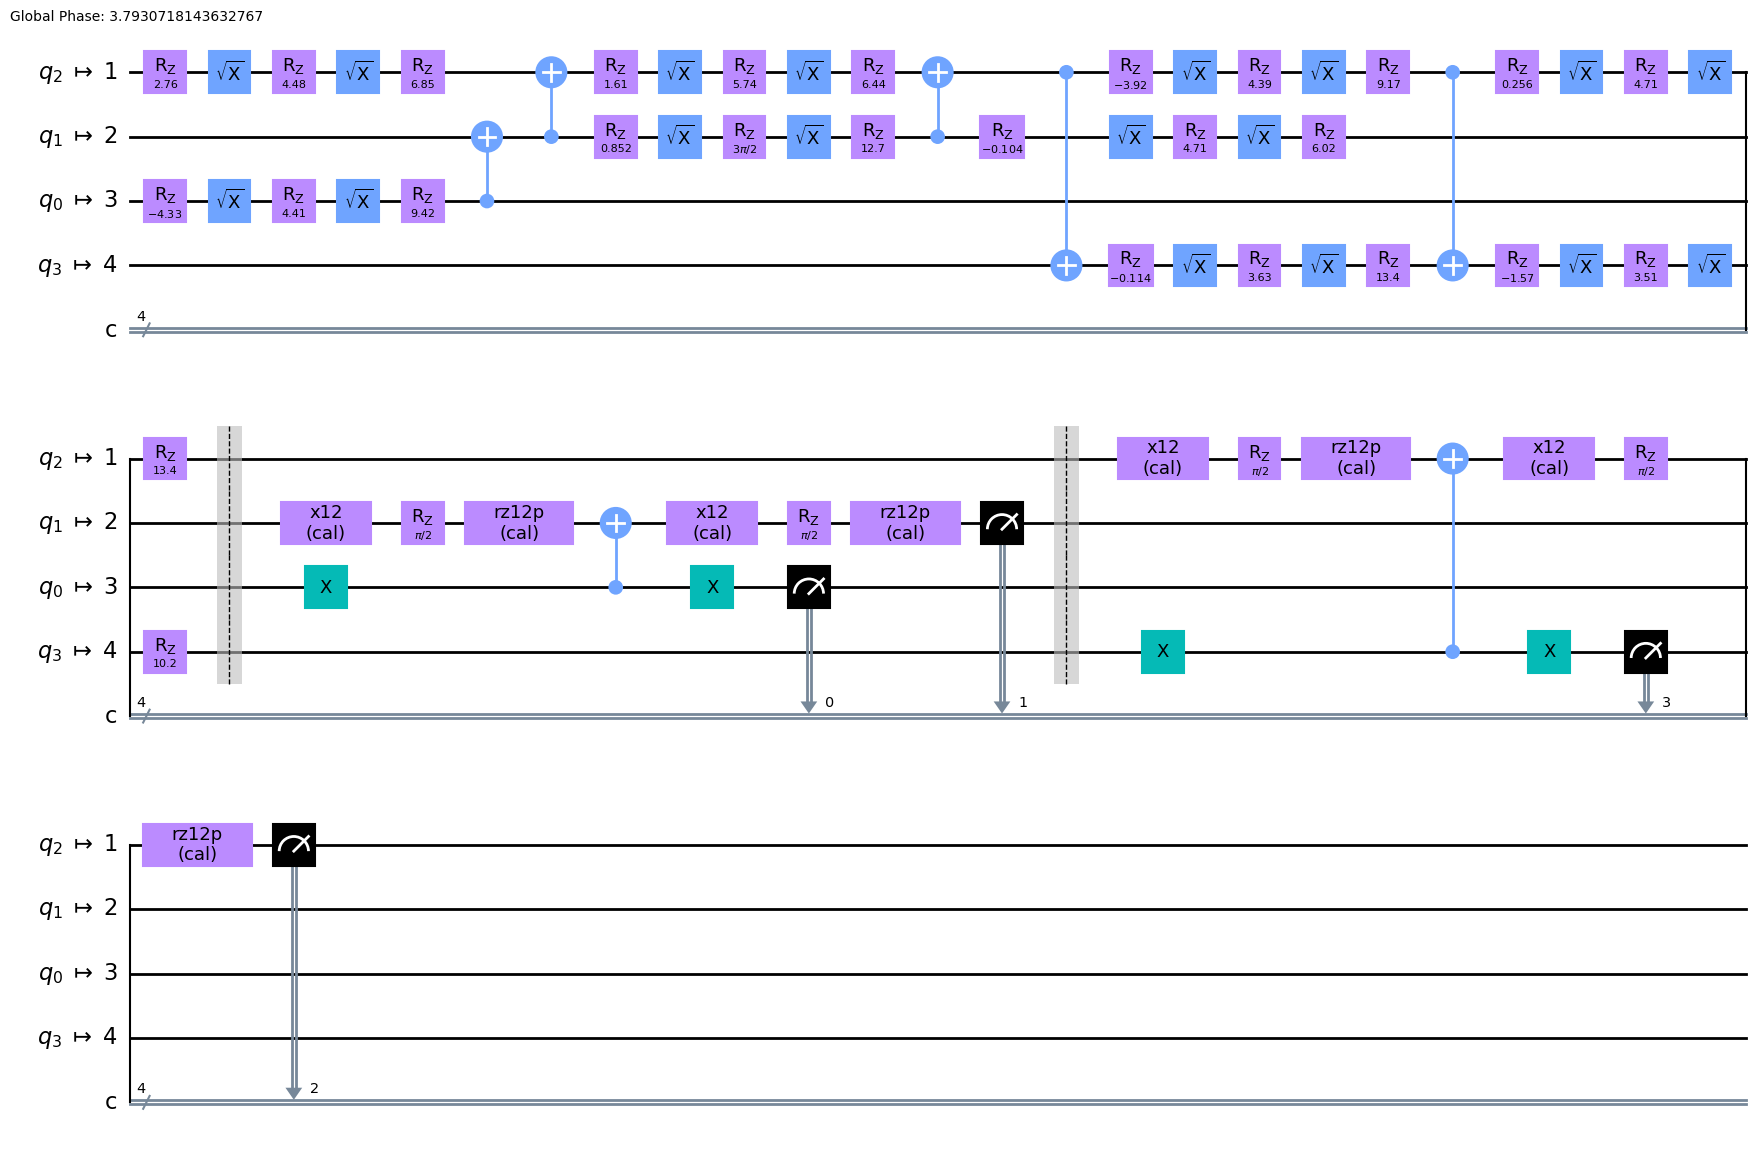

In [36]:
cir0().draw("mpl",idle_wires=False)

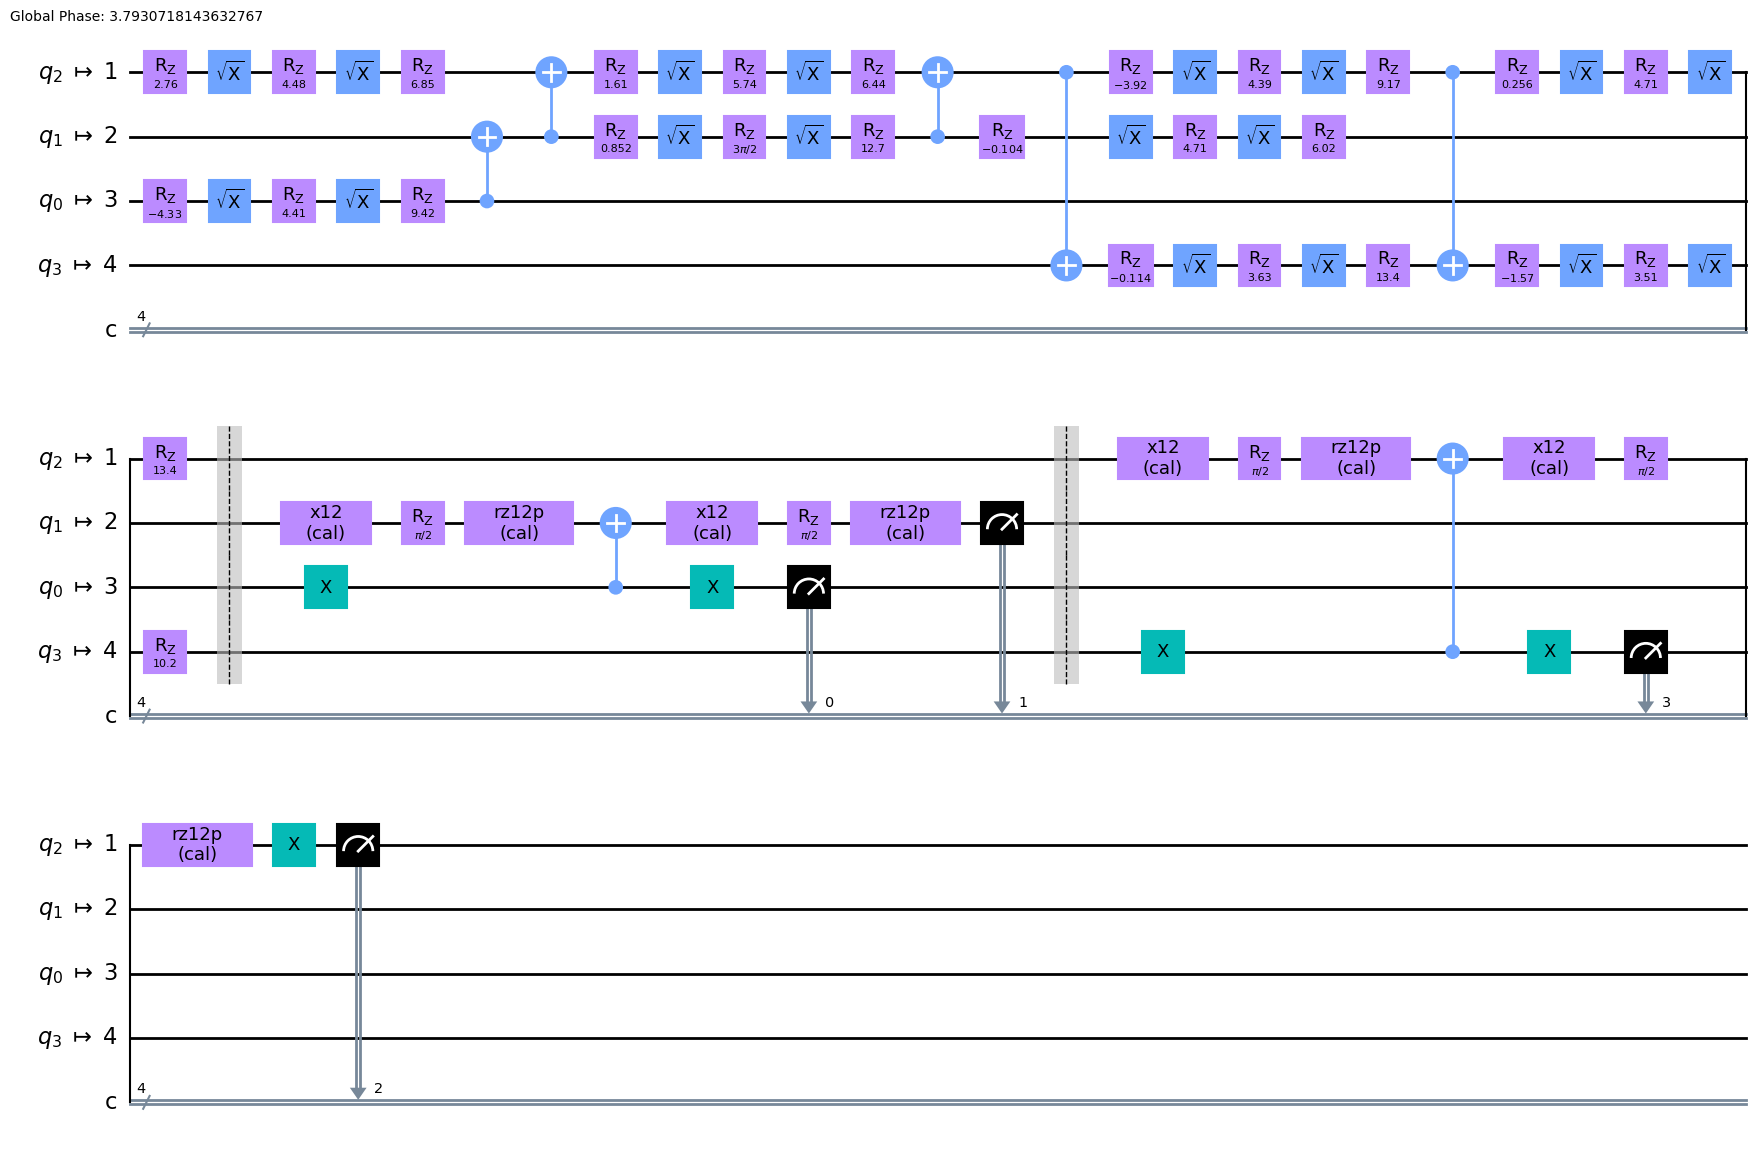

In [37]:
cir1().draw("mpl",idle_wires=False)

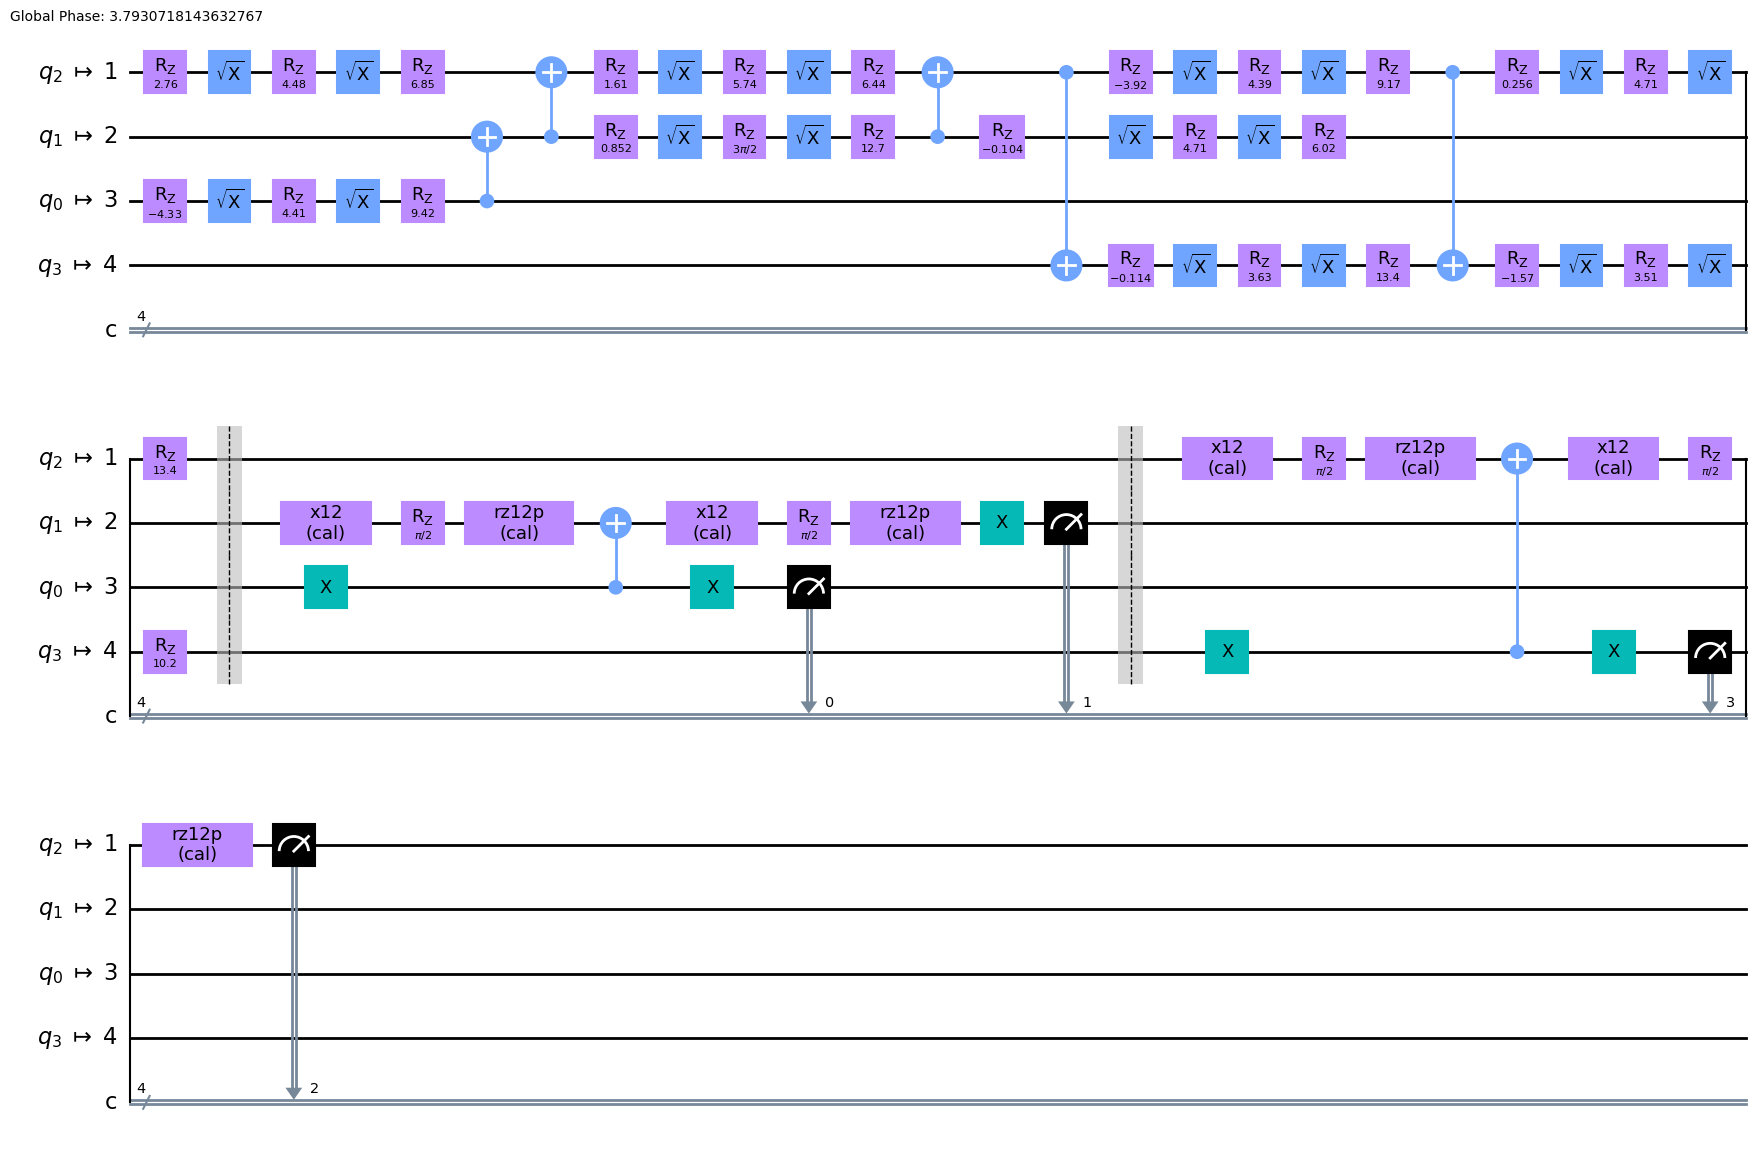

In [38]:
cir2().draw("mpl",idle_wires=False)

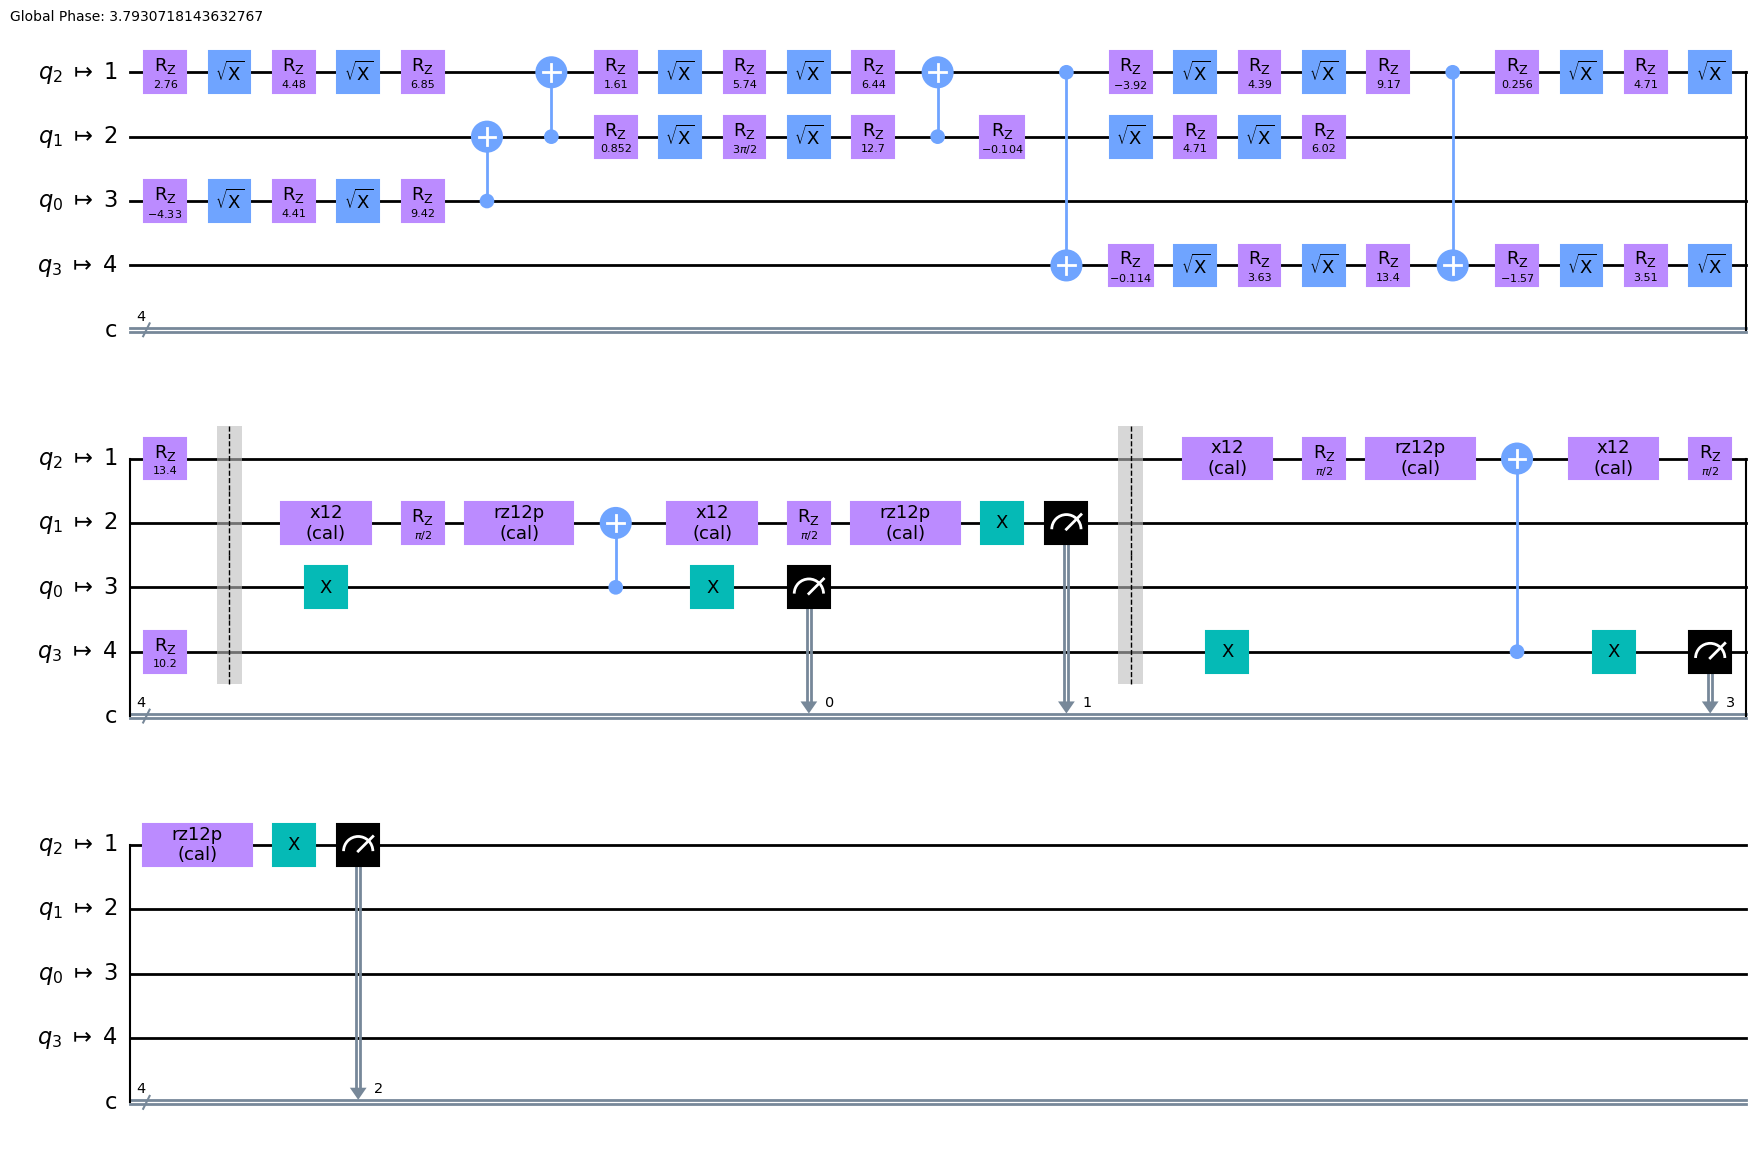

In [40]:
cir3().draw("mpl",idle_wires=False)

In [32]:
backend

<IBMBackend('ibm_hanoi')>

In [2]:
#Extracting the jobs

from math import pi
from qiskit_ibm_runtime import Session, Estimator, Sampler, Options
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options


job = service.job('crdmfm669nf0008ffggg')

Result = job.result()
Result

SamplerResult(quasi_dists=[{0: 0.000772486598776, 1: 0.006914466233337, 2: 0.01928113228509, 3: 0.001639693282923, 4: 0.012408548542189, 5: 0.182387885778138, 6: 0.376701943825825, 7: 0.043940199448172, 8: -0.002330994181148, 9: 0.017862439964865, 10: 0.198793584352587, 11: 0.046004480852901, 12: 0.003534599167349, 13: 0.038644903915097, 14: 0.051608215678043, 15: 0.001836414255854}, {0: 0.00538383541265, 1: 0.012058749727763, 2: 0.17666610762674, 3: 0.045740529793887, 4: 0.010303305708194, 5: 0.153897240054022, 6: 0.223283350394554, 7: 0.013652762290921, 8: 0.000492239596946, 9: 0.046977217552166, 10: 0.043600850808999, 11: 0.002194630736703, 12: -0.001059336194804, 13: 0.011378689011761, 14: 0.194882370470383, 15: 0.060547457009113}, {0: 0.012944540161887, 1: 0.00186375023341, 2: 0.003829063426327, 3: 0.010068860172958, 4: 0.174626546976983, 5: 0.064875575146638, 6: 0.172323688017382, 7: 0.20147401520172, 8: 0.003853045410753, 9: 0.056221843767928, 10: 0.17921482001144, 11: 0.0158045

In [4]:
R = [Result.quasi_dists[i].binary_probabilities() for i in range(4)]

In [5]:

#Initialise 4x1 arrays each for the qutrits in '0', '1' and '2'. In each of these subarrays (say '0'),
#we have a 2 qutrit system whose fidelity we know how to calculate 

import numpy as np

p00 = np.zeros(4)

tp01 = np.zeros(4)

tp10 = np.zeros(4)

tp11 = np.zeros(4)

p01 = np.zeros(4)

p10 = np.zeros(4)

p11 = np.zeros(4)

p02 = np.zeros(4)

p20 = np.zeros(4)

p12 = np.zeros(4)

p21 = np.zeros(4)

p22 = np.zeros(4)

###i = 0, j = 0###

p00[0] =  R[0].get('0000', "N/A")  #== P['0000']

tp01 = R[0].get('0010', "N/A") #== P['0010'] + P['0020'] 

tp10 = R[0].get('0100', "N/A") #== P['0100'] + P['0200'] 

tp11 = R[0].get('0110', "N/A") #== P['0110'] + P['0120'] + P['0210'] + P['0220']  

p01[0] = R[1].get('0000', "N/A") #== P['0010'] 

p10[0] = R[2].get('0000', "N/A") #== P['0100']

p11[0] = R[3].get('0000', "N/A") #== P['0110']

p02[0] = tp01 - p01[0] #== P['0020']

p20[0] = tp10 - p10[0] #== P['0200']

fp01 = R[3].get('0010', "N/A")
fp10 = R[3].get('0100', "N/A")

p12[0] = fp01 - p10[0] #== P['0120']

p21[0] = fp10 - p01[0] #== P['0210']

p22[0] = p00[0] + tp01 + tp10 + tp11 -(p00[0] + p01[0] + p02[0] + p10[0] + p11[0] + p12[0] + p20[0] + p21[0]) #== P['0220']

###i = 0, j = 1###

p00[1] =  R[0].get('0001', "N/A")  #== P['0001']

tp01 = R[0].get('0011', "N/A") #== P['0011'] + P['0021'] 

tp10 = R[0].get('0101', "N/A") #== P['0101'] + P['0201'] 

tp11 = R[0].get('0111', "N/A") #== P['0111'] + P['0121'] + P['0211'] + P['0220']  

p01[1] = R[1].get('0001', "N/A") #== P['0011']  

p10[1] = R[2].get('0001', "N/A") #== P['0101']

p11[1] = R[3].get('0001', "N/A") #== P['0111']

p02[1] = tp01 - p01[1] #== P['0021']

p20[1] = tp10 - p10[1] #== P['0201']

fp01 = R[3].get('0011', "N/A")
fp10 = R[3].get('0101', "N/A")

p12[1] = fp01 - p10[1] #== P['0121']

p21[1] = fp10 - p01[1] #== P['0211']

p22[1] = p00[1] + tp01 + tp10 + tp11 -(p00[1] + p01[1] + p02[1] + p10[1] + p11[1] + p12[1] + p20[1] + p21[1]) #== P['0221']


###i = 1, j = 0###

p00[2] =  R[0].get('1000', "N/A")  #== P['1000']

tp01 = R[0].get('1010', "N/A") #== P['1010'] + P['1020'] 

tp10 = R[0].get('1100', "N/A") #== P['1100'] + P['1200'] 

tp11 = R[0].get('1110', "N/A") #== P['1110'] + P['1120'] + P['1210'] + P['1220']  

p01[2] = R[1].get('1000', "N/A") #== P['1010']  

p10[2] = R[2].get('1000', "N/A") #== P['1100']

p11[2] = R[3].get('1000', "N/A") #== P['1110']

p02[2] = tp01 - p01[2] #== P['1020']

p20[2] = tp10 - p10[2] #== P['1200']

fp01 = R[3].get('1010', "N/A")
fp10 = R[3].get('1100', "N/A")

p12[2] = fp01 - p10[2] #== P['1120']

p21[2] = fp10 - p01[2] #== P['1210']

p22[2] = p00[2] + tp01 + tp10 + tp11 -(p00[2] + p01[2] + p02[2] + p10[2] + p11[2] + p12[2] + p20[2] + p21[2]) #== P['1220']


###i = 1, j = 1###

p00[3] =  R[0].get('1001', "N/A")  #== P['1001']

tp01 = R[0].get('1011', "N/A") #== P['1011'] + P['1021'] 

tp10 = R[0].get('1101', "N/A") #== P['1101'] + P['1201'] 

tp11 = R[0].get('1111', "N/A") #== P['1111'] + P['1121'] + P['1211'] + P['1221']  

p01[3] = R[1].get('1001', "N/A") #== P['1011']  

p10[3] = R[2].get('1001', "N/A") #== P['1101']

p11[3] = R[3].get('1001', "N/A") #== P['1111']

p02[3] = tp01 - p01[3] #== P['1021']

p20[3] = tp10 - p10[3] #== P['1201']

fp01 = R[3].get('1011', "N/A")
fp10 = R[3].get('1101', "N/A")

p12[3] = fp01 - p10[3] #== P['1121']

p21[3] = fp10 - p01[3] #== P['1211']

p22[3] = p00[3] + tp01 + tp10 + tp11 -(p00[3] + p01[3] + p02[3] + p10[3] + p11[3] + p12[3] + p20[3] + p21[3]) #== P['1221']



###expected wavevector###

###in this sector, we find the following:###
###no 2's on either of the outermost qubits###
####
p2002 = 0
p2012 = 0
p2102 = 0
p2112 = 0
p2022 = 0
p2202 = 0
p2122 = 0
p2212 = 0
p2222 = 0
####
p2000 = 0
p2010 = 0
p2100 = 0
p2110 = 0
p2020 = 0
p2200 = 0
p2120 = 0
p2210 = 0
p2220 = 0
####
p0002 = 0
p0012 = 0
p0102 = 0
p0112 = 0
p0022 = 0
p0202 = 0
p0122 = 0
p0212 = 0
p0222 = 0
####
p2001 = 0
p2011 = 0
p2101 = 0
p2111 = 0
p2021 = 0
p2201 = 0
p2121 = 0
p2211 = 0
p2221 = 0
####
p1002 = 0
p1012 = 0
p1102 = 0
p1112 = 0
p1022 = 0
p1202 = 0
p1122 = 0
p1212 = 0
p1222 = 0
####
p0000 = p00[0]
p0010 = p01[0]
p0100 = p10[0]
p0110 = p11[0]
p0020 = p02[0]
p0200 = p20[0]
p0120 = p12[0]
p0210 = p21[0]
p0220 = p22[0]
####
p0001 = p00[1]
p0011 = p01[1]
p0101 = p10[1]
p0111 = p11[1]
p0021 = p02[1]
p0201 = p20[1]
p0121 = p12[1]
p0211 = p21[1]
p0221 = p22[1]
####
p1000 = p00[2]
p1010 = p01[2]
p1100 = p10[2]
p1110 = p11[2]
p1020 = p02[2]
p1200 = p20[2]
p1120 = p12[2]
p1210 = p21[2]
p1220 = p22[2]
####
p1001 = p00[3]
p1011 = p01[3]
p1101 = p10[3]
p1111 = p11[3]
p1021 = p02[3]
p1201 = p20[3]
p1121 = p12[3]
p1211 = p21[3]
p1221 = p22[3]



final_wavevector = [p0000, p0010, p0010, p0110, p0020, p0200, p0120, p0210, p0220,
                    p0001, p0011, p0011, p0111, p0021, p0201, p0121, p0211, p0221,
                    p1000, p1010, p1010, p1110, p1020, p1200, p1120, p1210, p1220,
                    p1001, p1011, p1011, p1111, p1021, p1201, p1121, p1211, p1221,
                    p0002, p0012, p0012, p0112, p0022, p0202, p0122, p0212, p0222,
                    p2000, p2010, p2010, p2110, p2020, p2200, p2120, p2210, p2220,
                    p2001, p2011, p2011, p2111, p2021, p2201, p2121, p2211, p2221,
                    p1002, p1012, p1012, p1112, p1022, p1202, p1122, p1212, p1222,
                    p2002, p2012, p2012, p2112, p2022, p2202, p2122, p2212, p2222]

print(final_wavevector)

[0.0007724865987761512, 0.005383835412650449, 0.005383835412650449, 0.014751031687786421, 0.013897296872439357, -0.0005359916196981725, 0.16560557559064695, 0.16157514322933206, 0.03477019331805975, 0.006914466233336851, 0.012058749727763282, 0.012058749727763282, 0.0499111701584058, -0.01041905644483981, 0.18052413554472743, 0.03513158076313495, -0.0011380662088026593, -0.03996448526456567, -0.002330994181148055, 0.0004922395969462584, 0.0004922395969462584, 0.03856795511235333, 0.1983013447556412, -0.00031844624340389557, 0.004009578011294221, 0.009808686156319411, -0.0007780036019235381, 0.017862439964865383, 0.046977217552166314, 0.046977217552166314, -0.000586339395054776, -0.000972736699265557, -0.017576939852830452, -0.021420604190964178, 0.008556652860840945, 0.01528670498103224, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
p =final_wavevector

In [8]:
# Expected wavevector 
Q = [(0j, '0000'),
     (0j, '0010'),
     (0j, '0100'),
     ((-0-0j), '0110'),
     (0j, '0020'),
     (0j, '0200'),
     ((-0.44721-0j), '0120'),
     ((0.44721+0j), '0210'),
     ((-0+0j), '0220'),
     (0j, '0001'),
     (0j, '0011'),
     (0j, '0101'),
     ((0.22361+0j), '0111'),
     (0j, '0021'),
     ((-0.44721-0j), '0201'),
     (0j, '0121'),    
     ((-0-0j), '0211'),
     (0j, '0221'),
     (0j, '1000'),
     ((-0+0j), '1010'),
     (0j, '1100'),
     ((-0.22361-0j), '1110'),
     ((0.44721+0j), '1020'),
     (0j, '1200'),
     (-0j, '1120'),
     (0j, '1210'),
     (0j, '1220'),
     (-0j, '1001'),
     ((-0.22361-0j), '1011'),
     ((0.22361-0j), '1101'),
     (0j, '1111'),
     (0j, '1021'),
     (0j, '1201'),
     (0j, '1121'),
     (0j, '1211'),
     (0j, '1221'),
     (0j, '0002'),
     (0j, '0012'),
     (0j, '0102'),
     (0j, '0112'),
     (0j, '0022'),
     (0j, '0202'),
     (0j, '0122'),
     (0j, '0212'),
     (0j, '0222'),
     (0j, '2000'),
     (0j, '2010'),
     (0j, '2100'),
     (0j, '2110'),
     (0j, '2020'),
     (0j, '2200'),
     (0j, '2120'),
     (0j, '2210'),
     (0j, '2220'),
     (0j, '2001'),
     (0j, '2011'),
     (0j, '2101'),
     (0j, '2111'),
     (0j, '2021'),
     (0j, '2201'),
     (0j, '2121'),
     (0j, '2211'),
     (0j, '2221'),
     (0j, '1002'),
     (0j, '1012'),
     (0j, '1102'),
     (0j, '1112'),
     (0j, '1022'),
     (0j, '1202'),
     (0j, '1122'),
     (0j, '1212'),
     (0j, '1222'),
     (0j, '2002'),
     (0j, '2012'),
     (0j, '2102'),
     (0j, '2112'),
     (0j, '2022'),
     (0j, '2202'),
     (0j, '2122'),
     (0j, '2212'),
     (0j, '2222')]

In [10]:
#Expected probaility wave vector
q = [Q[i][0]*Q[i][0] for i in range(len(Q))]

In [13]:
import numpy as np

def hellinger_fidelity(p, q):
    """
    Compute the Hellinger Fidelity between two probability distributions p and q.
    
    Parameters:
    p (list or numpy array): First probability distribution.
    q (list or numpy array): Second probability distribution.
    
    Returns:
    float: Hellinger Fidelity between the distributions.
    """
    p = [np.max([p[i],0]) for i in range(len(p))]
    q = [np.max([q[i],0]) for i in range(len(q))]
    
    assert len(p) == len(q), "Distributions must have the same length"
    
    return np.sum([np.sqrt(p[i]*q[i]) for i in range(len(p))])**2


fidelity = hellinger_fidelity(p, q)
print("Hellinger Fidelity:", fidelity)

Hellinger Fidelity: (0.8868240034954689+0j)
